# Video game sales analytics


You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

# Step 1. Open the data file and study the general information


In [29]:
# importing relevant packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#loading data
#x= pd.read_csv('/Users/Kushal/Desktop/games.csv')
x= pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
#inspecting data
x.head()
x.replace(to_replace='tbd',value=np.nan) #We are doing this because we do not want to incorporate the effects of tbd
#x['platform'].value_counts()
#x.info()
#x.describe()
#for i in nan_counts:
 #   if(i == platform[])


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [30]:
#float_vector = ['name','platform','genre']
#Making the columns with strings lowercase to avoid boolean errors

x['Name'] = x['Name'].str.lower()
x['Platform'] = x['Platform'].str.lower()
x['Genre'] = x['Genre'].str.lower()
x[['Platform','Critic_Score']].head()


x.head().to_dict('list')


{'Name': ['wii sports',
  'super mario bros.',
  'mario kart wii',
  'wii sports resort',
  'pokemon red/pokemon blue'],
 'Platform': ['wii', 'nes', 'wii', 'wii', 'gb'],
 'Year_of_Release': [2006.0, 1985.0, 2008.0, 2009.0, 1996.0],
 'Genre': ['sports', 'platform', 'racing', 'sports', 'role-playing'],
 'NA_sales': [41.36, 29.08, 15.68, 15.61, 11.27],
 'EU_sales': [28.96, 3.58, 12.76, 10.93, 8.89],
 'JP_sales': [3.77, 6.81, 3.79, 3.28, 10.22],
 'Other_sales': [8.45, 0.77, 3.29, 2.95, 1.0],
 'Critic_Score': [76.0, nan, 82.0, 80.0, nan],
 'User_Score': ['8', nan, '8.3', '8', nan],
 'Rating': ['E', nan, 'E', 'E', nan]}

In [31]:
def lowercase_columns(df):
    return df.rename(str.lower, axis='columns')

x = lowercase_columns(x)

In [32]:
x.head(3)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Here I converted all the columns with upper case letters to only words with lower case letters. rating has letters but they are all upper case so it shouldn't bother us. I also conveerted the names of all columns to lowercase.

# Step 2. Prepare the data

In [33]:
x['critic_score'].isna().sum()
platform = x['platform'].value_counts()
nan_counts = x[x['critic_score'].isna()]['platform'].value_counts()
#print(nan_counts.size)
nan_counts[platform.isin(nan_counts)]
#print(nan_counts.size)

#print(x['critic_score'].head(10))
x.update(
    x.groupby('platform').critic_score.transform('mean'),
    overwrite=False)
x['critic_score'].isna().sum()
platform = x['platform'].value_counts()
nan_counts = x[x['critic_score'].isna()]['platform'].value_counts()
#print(nan_counts.size)
nan_counts[platform.isin(nan_counts)]
#print(nan_counts.size)

#print(platform)
#print(nan_counts)
        
#print(x['critic_score'].head(10))
#x.head()

x['critic_score'] = pd.to_numeric(x['critic_score'])
x['year_of_release'] = x['year_of_release'].fillna(value=0)
x['year_of_release'] = x['year_of_release'].astype(int)
x['total_sales'] = x['na_sales']+x['eu_sales']+x['jp_sales']+x['other_sales']
#x.info()
print(x['critic_score'].isnull().sum())



1120


We see a problem right away, there are 8578 entries in critic_score that are null. However, 1120 of them are from platforms that do not have critic scores at all. This is still too much, so I averaged the critic score based on which platform the game belonged to. I replaced the missing year with 0, this allowed me to convert the type to int since year does not need to be float. 

In [34]:
print('total number of nulls in "critic_score" column -', x['critic_score'].isnull().sum())

total number of nulls in "critic_score" column - 1120


# Step 3. Analyze the data

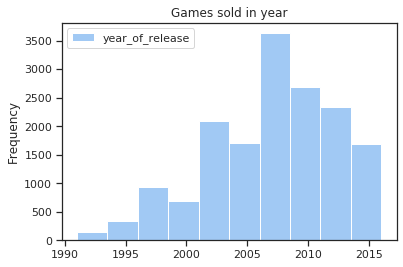

In [35]:
x['year_of_release'].value_counts().count()
x_year = x[x.year_of_release != 0]
#print(x_year['year_of_release'].value_counts().sort_values())
#x_year.plot(kind='hist',y = 'year_of_release', title ='Games sold in year',bins = 37)
#x = x[x.year_of_release < 1982]
x_year = x[x.year_of_release >= 1991]
#print(x_year['year_of_release'].value_counts())
x_year.plot(kind='hist',y = 'year_of_release', title ='Games sold in year')


We see that as technology gets better, we have more games, reaching a peak in 2008 and then dropping off. Perhaps studios started going for quality instead of quantity. Before 1982, there were fewer than 30 games being released. For this reason, I will filter those years out.

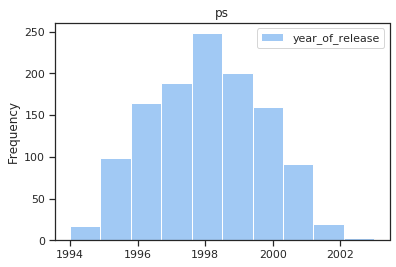

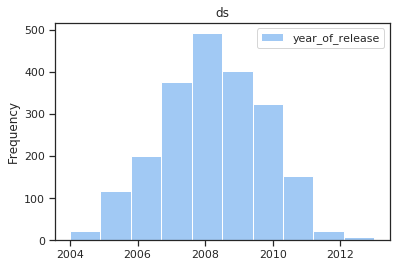

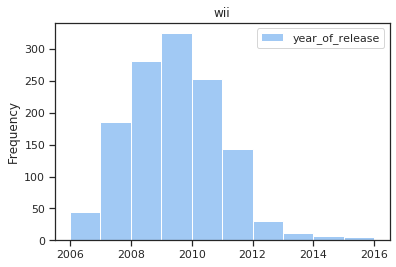

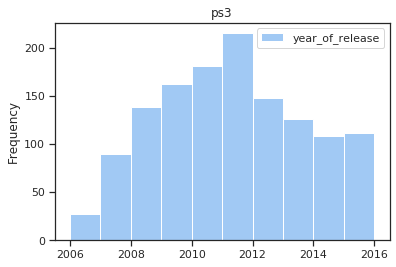

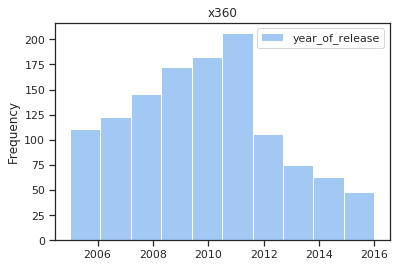

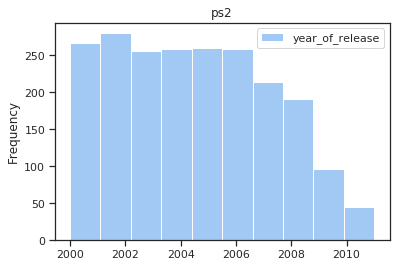

In [36]:
best_platforms = x.pivot_table(index='platform',values ='total_sales',aggfunc='sum').reset_index().sort_values(by = 'total_sales').tail(6)
#best_platforms.info()
for i in best_platforms['platform']:
    x_year[x_year.platform == i].plot(kind='hist',y = 'year_of_release', title = i)


    

We have created the histograms for each best selling platform's sales over the years.

In [37]:
early_platforms = x_year.pivot_table(index='platform',values ='year_of_release',aggfunc='min').reset_index().sort_values(by = 'year_of_release')
#print(early_platforms)
late_platforms = x_year.pivot_table(index='platform',values ='year_of_release',aggfunc='max').reset_index().sort_values(by = 'year_of_release')
#late_platforms
years_lasted = pd.merge(early_platforms, late_platforms,on='platform')
years_lasted.columns = ['platform','first_year','last_year']
years_lasted['years_lasted'] = years_lasted['last_year'] - years_lasted['first_year']
#years_lasted.sort_values('years_lasted')
print(years_lasted['years_lasted'].mean())
years_lasted['first_year'].std()
years_lasted['last_year'].std()

6.266666666666667


8.918790702007021

The PS2 had a good run from 2000 to 2011, but after that it made no sales. Similarly, the xbox360 lasted from 2005 to 2016 and hasn't made any sales since then. The PC lasted a great 24 years but hasn't made any sales since 2016. The wii, ps3, gb and dc each lasted 10 years. On average, a platform lasts 6 years. The year in which the first sale was made of a platform has  a standard deviation of 7.35, which gives us some insight into how often a new platform pops up. The year in which the last sale was made of a platform has  a standard deviation of 8.91, which gives us some insight into how often a platform stops creating games. This means every 7 years we should see a new platform, and every 9 years we should expect a platform to drop off the market. This is supported by the evidence that a platform lasts an average of 6 years, since gamers are probably primarily playing the more established platforms like PC and PS and that the other platforms have a shorter lifespan because gamers play on those platforms secondarily. 

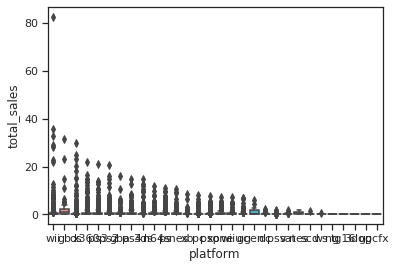

In [38]:
#x_year['total_sales']

import seaborn as sns
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='platform', y='total_sales',data=x_year)
#sns.despine(offset=10, trim=True)


While this set of boxplots look pretty, they don't tell us anything. Let us only focus on the platforms that earned more than 500 million. There are only 6 platforms that did this.

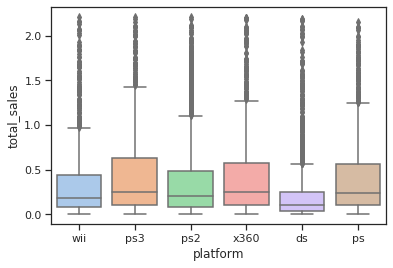

In [39]:
#print(best_platforms.head())
best_platforms_best = x_year[x_year['platform'].isin(best_platforms['platform'])]
#best_platforms_best.head()
q3 = best_platforms_best['total_sales'].quantile(.95)
filtered_entries = (best_platforms_best['total_sales'] < q3 )
best_platforms_best = best_platforms_best[filtered_entries]
#best_platforms_best = x_year[x_year['platform'].isin(best_platforms_best_sales['platform'])]
sns.boxplot(x='platform', y='total_sales',data=best_platforms_best)
#best_platforms_best.pivot_table(index='platform',values ='total_sales',aggfunc='mean').reset_index()


Here we see a much better graph that we can actually see the box plots of. It doesn't look like the median sales of of each platform should differ much, but we do see that the averages do indicate what we see in the box plots. The average sales of PS3 is the highest while the Nintendo DS is the poorest performing of the top 6 with an average of 0.22 million.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.4041785716804624


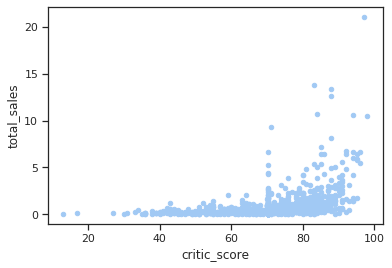

In [40]:
x_ps3 = x[x['platform']=='ps3']
x_ps3.plot(x='critic_score', y='total_sales', kind='scatter')
print(x_ps3['total_sales'].corr(x_ps3['critic_score']))

I chose to study PS3's correlation between sales and critic scores. With a correlation coefficient of 0.40, we can say that there is some positive correlation between higher critic score and total sales a game makes. However, There is one game that made 20+ mil dollars in sales that had a very high critic score, this might be inflating the correlation. Still, it's not a bad indicator for game developers, if they can get a critic score as high as that game, then maybe they too could sell that much.

In [41]:
games = x.groupby(by = 'name').std().dropna().sort_values(by='total_sales')
print(games.head())
games.tail()


                                           year_of_release  na_sales  \
name                                                                   
rocksmith 2014 edition remastered                 0.000000       0.0   
rabbids invasion: the interactive tv show         0.000000       0.0   
dave mirra bmx challenge                          0.707107       0.0   
prototype: biohazard bundle                       0.000000       0.0   
deadliest warrior: ancient combat                 0.000000       0.0   

                                           eu_sales  jp_sales  other_sales  \
name                                                                         
rocksmith 2014 edition remastered               0.0       0.0          0.0   
rabbids invasion: the interactive tv show       0.0       0.0          0.0   
dave mirra bmx challenge                        0.0       0.0          0.0   
prototype: biohazard bundle                     0.0       0.0          0.0   
deadliest warrior: ancient 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
name,,,,,,,
call of duty: modern warfare 3,0.000000,4.183734,2.628705,0.231589,0.732592,8.717798,7.397856
grand theft auto v,0.836660,3.628246,3.333044,0.419857,1.524598,0.447214,8.032906
grand theft auto iii,0.707107,4.942676,3.181981,0.212132,0.919239,2.828427,9.256028
grand theft auto: san andreas,1.732051,4.528454,0.381663,0.205000,5.261770,12.560362,9.927153
grand theft auto: vice city,0.707107,5.946768,3.860803,0.332340,1.251579,0.707107,11.391490


The GTA franchise seems to have had the biggest difference across platforms, with vice city differing as much as 11 million dollars in total sales. A lot of platforms, at least more than 80, made the exact same amount on all platforms (or rather whichever platform they chose to make a game on).

           genre  total_sales
0         action     1.145597
1      adventure     0.508533
2       fighting     0.952304
3           misc     1.304635
4       platform     2.574506
5         puzzle     1.562444
6         racing     1.656602
7   role-playing     1.710178
8        shooter     1.816425
9     simulation     1.186820
10        sports     2.084778
11      strategy     0.518998
           genre  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
11      strategy          1349781     68.55     45.17     49.66        10.85   
1      adventure          2596685    105.26     63.54     52.30        16.49   
5         puzzle          1140976    122.87     50.01     57.31        12.38   
9     simulation          1719697    181.92    113.52     63.80        30.73   
2       fighting          1677895    223.36    100.33     87.48        36.36   
6         racing          2457964    359.35    236.51     56.71        76.10   
3           misc          3454612    407.27    212

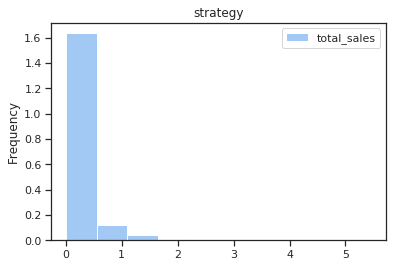

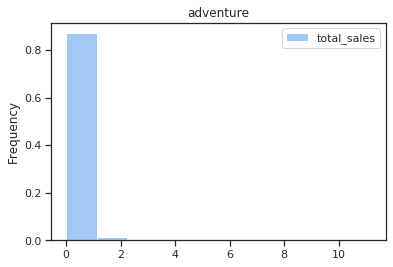

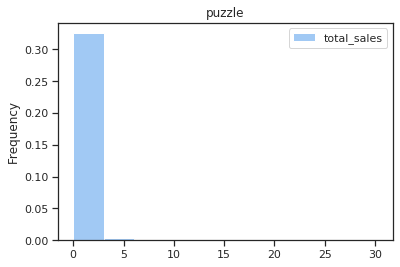

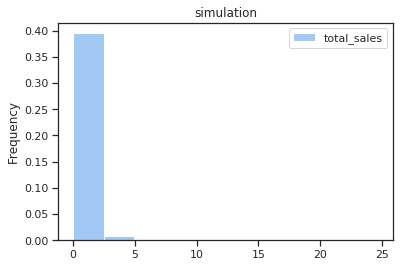

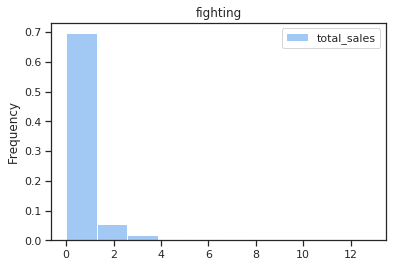

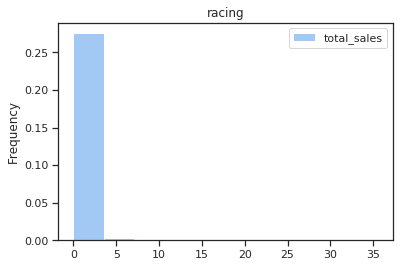

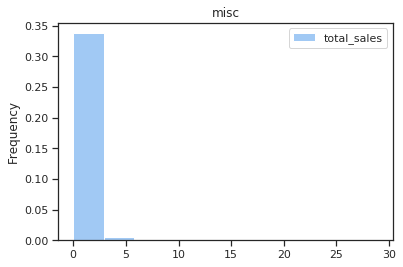

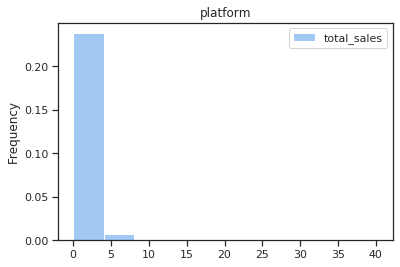

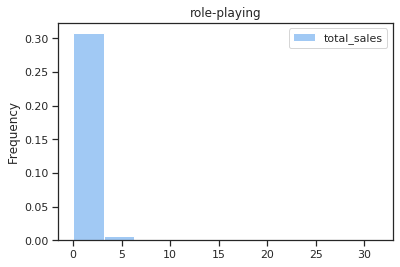

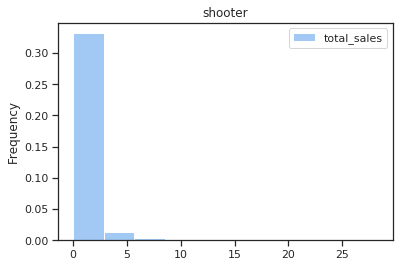

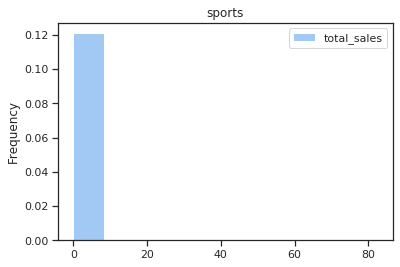

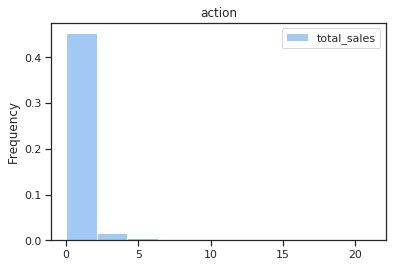

In [42]:
genre = x.groupby(by = 'genre',as_index=False).sum().dropna().sort_values(by='total_sales')
genre_std = x.pivot_table(index='genre',values ='total_sales',aggfunc='std').reset_index()
print(genre_std)
print(genre)
    
for i in genre['genre']:
    x[x.genre == i].plot(kind='hist',y = 'total_sales', title =i,density=True,legend=True)



The action genre makes the most sales. It also has the a high standard deviation. This means that betting on action games might not be wise since there is a decent chance that it will not sell. Sports is the second highest seller but it too has a very high standard deviation, much higher than action. Strategy has the lowest sales but it also has low standard deviations, meaning that it is a safer bet with not so big reward. A generalization could be made, but with caution.

# Step 4. Create a user profile for each region

In [43]:
na_platforms =  x.pivot_table(index='platform',values ='na_sales',aggfunc='sum').reset_index().sort_values(by='na_sales')
#na_platforms.tail()
eu_platforms =  x.pivot_table(index='platform',values ='eu_sales',aggfunc='sum').reset_index().sort_values(by='eu_sales')
#eu_platforms.tail()
jp_platforms =  x.pivot_table(index='platform',values ='jp_sales',aggfunc='sum').reset_index().sort_values(by='jp_sales')
#jp_platforms.tail()
region_platforms = na_platforms.merge(eu_platforms, on = 'platform')
region_platforms = region_platforms.merge(jp_platforms, on = 'platform')
#region_platforms.info()
region_platforms['na-eu_market_share'] = abs(region_platforms['na_sales'] - region_platforms['eu_sales'])
region_platforms['na-jp_market_share'] = abs(region_platforms['na_sales'] - region_platforms['jp_sales'])
region_platforms['jp-eu_market_share'] = abs(region_platforms['jp_sales'] - region_platforms['eu_sales'])
region_platforms.sort_values('na-eu_market_share').tail()
region_platforms.sort_values('na-jp_market_share').tail()
region_platforms.sort_values('jp-eu_market_share').tail()

,platform,na_sales,eu_sales,jp_sales,na-eu_market_share,na-jp_market_share,jp-eu_market_share
16,pc,94.53,142.44,0.17,47.91,94.36,142.27
28,wii,496.90,262.21,69.33,234.69,427.57,192.88
29,ps2,583.84,339.29,139.20,244.55,444.64,200.09
27,ps3,393.49,330.29,80.19,63.20,313.30,250.10
30,x360,602.47,270.76,12.43,331.71,590.04,258.33


For NA, the top 5 platforms are: ds, ps3, wii, ps2 and x360. For eu, the top 5 platforms are: ps, wii, x360, ps3 and ps2. For jp, the top 5 platforms are: 3ds, snes, ps2, ps and ds. For the na-eu_market_share, the platforms that have the biggest differences are x360, ps2, wii, ds and xb with x360 making 331 million dollars more depending on region.
For the na-jp_market_share, the platforms that have the biggest differences are x360, ps2, wii, ps3, ds with x360 making 590 million dollars more depending on region. For the jp-eu_market_share, the platforms that have the biggest differences are pc, wii, ps2, ps3, x360 with x360 making 258 million dollars more depending on region.




In [44]:
na_genre =  x.pivot_table(index='genre',values ='na_sales',aggfunc='sum').reset_index().sort_values(by='na_sales')
print(na_genre.tail())
eu_genre =  x.pivot_table(index='genre',values ='eu_sales',aggfunc='sum').reset_index().sort_values(by='eu_sales')
print(eu_genre.tail())
jp_genre =  x.pivot_table(index='genre',values ='jp_sales',aggfunc='sum').reset_index().sort_values(by='jp_sales')
jp_genre.tail()

       genre  na_sales
3       misc    407.27
4   platform    445.50
8    shooter    592.24
10    sports    684.43
0     action    879.01
      genre  eu_sales
3      misc    212.74
6    racing    236.51
8   shooter    317.34
10   sports    376.79
0    action    519.13


,genre,jp_sales
3,misc,108.11
4,platform,130.83
10,sports,135.54
0,action,161.43
7,role-playing,355.41


For NA, the top 5 genres are: action, sports, shooter, platform and misc. For eu, the top 5 genres are: action, sports, shooter, racing and misc. For jp, the top 5 genres are: role-playing, action, sports, platform, and misc. Different regions have different affinities for different genres, so it is natural to expect such variation.

In [45]:
na_rating =  x.pivot_table(index='rating',values ='na_sales',aggfunc='sum').reset_index().sort_values(by='na_sales')
na_rating_range = na_rating['na_sales'].max()-na_rating['na_sales'].min()
eu_rating =  x.pivot_table(index='rating',values ='eu_sales',aggfunc='sum').reset_index().sort_values(by='eu_sales')
eu_rating_range = eu_rating['eu_sales'].max()-eu_rating['eu_sales'].min()
jp_rating =  x.pivot_table(index='rating',values ='jp_sales',aggfunc='sum').reset_index().sort_values(by='jp_sales')
jp_rating_range = jp_rating['jp_sales'].max()-jp_rating['jp_sales'].min()
jp_rating_range
eu_rating_range
na_rating_range

1292.9899999999434

In jp, the ESRB rating can make as much as 198 million dollars worth of sales difference, In eu, the ESRB rating can make as much as 710 million dollars worth of sales difference, In NA, the ESRB rating can make as much as 1292 million dollars worth of sales difference

# Step 5. Test the following hypotheses:

In [46]:
x_user = x
x_user['user_score'] = x['user_score'].dropna(how='all')
#print(x_user['user_score'])
x_user['user_score'] = pd.to_numeric(x_user['user_score'],errors = 'coerce')
xbox_users = x_user.query('platform == "xone"')['user_score']
#print(xbox_mu.info())
xbox_mu = xbox_users.mean()
#print(xbox_mu)
pc_user = x_user.query('platform == "pc"')['user_score']
#pc_mu = x[x['platform'] =='pc']
#print(pc_mu)
pc_mu = pc_user.mean()
pc_mu
xbox_mu

6.521428571428572

Now, we will test the null hypothesis that average user ratings of the Xbox One and PC platforms are the same against the alternative hypothesis that the average user ratings of the Xbox One and PC platforms are not the same. The mean for the pc is 7.062 and the mean for the xbox is 6.521. This is a difference of almost 0.5 of a score, which in a 10 point scale is a lot. My prediction is that mean user rating for each platforms is not the same.

In [47]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(xbox_users, pc_user, equal_var=True, nan_policy='omit')
print('p-value:', result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")


p-value: 1.3896435533545967e-05
We reject the null hypothesis


With a p-value much less than 0.05, we can confidently reject the null hypothesis and say that the platforms have different user ratings.

In [48]:
x_user = x
x_user['user_score'] = x['user_score'].dropna(how='all')
#print(x_user['user_score'])
x_user['user_score'] = pd.to_numeric(x_user['user_score'],errors = 'coerce')
action_users = x_user.query('genre == "action"')['user_score']
#print(xbox_mu.info())
action_mu = action_users.mean()
#print(xbox_mu)
sports_user = x_user.query('genre == "sports"')['user_score']
#pc_mu = x[x['platform'] =='pc']
#print(pc_mu)
sports_mu = sports_user.mean()
sports_mu
action_mu

7.054043715846995

Now, we will test the null hypothesis that average user ratings of the sports genre and action genre are the same against the alternative hypothesis that the average user ratings of the sports genre and PC action genre are not the same. The mean for the sports genre is 6.96 and the mean for the action genre is 7.05. This is a difference of almost 0.1 of a score, which even in a 10 point scale is not a lot. My prediction is that mean user rating for each genre  is the same.

In [49]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(action_users, sports_user, equal_var=True, nan_policy='omit')
print('p-value:', result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: 0.10406951359035752
We cannot reject the null hypothesis


As predicted, the difference in the user ratings of both genres is not significant enough for us to say that one action or sports on average should have higher user ratings than the other. It seems like the performance of both genres are comparable.

# Step 6. General Conclusions


Ice has several exciting insights from this data that they can use to better plan their advertising and make informed decisions on the success of a game. 

I would call 1982 the year where gaming began dipping its feet in the water of becoming a major industry, but really, it is the 2000s that made gaming the mammoth it is today. Game sales hit their peak in 2006 and since then sales have had a slow, but gradual fall. This might have to do more with games getting much better and console game capacity increase, which meant that gamers took much longer to get bored of games compared to when games were on casettes and didn't have much scope to hold attention beyond a few dozen hours. 

The typical lifespan of a console appears to be approximate 6 years from release to the begin of the decline. However, there appears to be overlap between a console and its successor, ranging from 1-2 years. Of all the top platforms, almost all of them seem to have a slow start, followed by a rapid increase in popularity, and then a gradual decrease in popularity. This makes sense because when a console is initially released, there aren't as many games made for it nor is their a societal pressure of having the same consoles as your friends. However, the decrease in sales of a console seems to have more to do with the market saturating and also the advent of newer consoles. The PS2 is the only oddity, which seemed to gain massive revenue in it's first few years of launching, so there must have been an effective ad campaign that supplemented it's cutting edge transformation of gaming. 


Despite it's more early and more consistent success, the PS2 did not get as much revenue as the PS3. This might have to do with the small gap in the years between PS2 and PS3's launch, where users did not see sense in buying the PS2 when the PS3 was out/close to launching. Perhaps Sony should have waited on the announcement of PS3 untill the PS2 fully got it's worth.

Although the PS3 was not as consistent as it's predecessor, it did do very with critic ratings, with a huge number of games scoring 80 or higher. We see that game sales increase with better critic ratings, so this defintiely paid off for Sony.

As for the guaging a game's success based on what platform it's made for, we saw some interesting phenomenon. Games like GTA were immensley more successful on some platforms as compared to others, while some games made almost the same amount of sales regardless of what platform they were made for.

Action has remained constantly the most profitable genre and Role-playing has remained moderately profitable, while Sports and Misc games have declined significantly in profitability in years past.

We also found some very interesting relations in the geographical profiles and genre of games. This can give the advertising team a very good insight into how they should base their strategy. While there were some variations in the popularity of each console in different regions, they generally did well in all regions if they did well in one. Finally, the ESRB rating makes a huge difference in the sales a game makes. Content creators need to evaluate if certain elements of the game that could affect their rating could compensate for that.

We can say with certainity that PC games do better than Xbox games in terms of rating, however we can not make such a claim about the difference in rating of sports and action games. A better way to investigate this question would be to study the difference in rating a particular game had in each platform. This was beyond the scope of the project requirement but I will explore this in my own time.





